-----------------

## Предобработка данных

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import datetime as dt 
from datetime import datetime, timedelta


In [3]:
visits, orders, costs = (
    pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
)

In [4]:

# Приведем название столбцов к верному формату
visits.columns = visits.columns.str.lower()
visits = visits.rename (columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
visits.head(10)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


In [5]:
visits['region'].value_counts()
#visits['Region'].unique()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [6]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [7]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Необходимо привести данные столбцов session_start и session_end к типу datetime

In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [11]:
visits.isna().sum() # проверим на количество пропусков

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
duplicated_visits = visits[visits.duplicated()].sum()
duplicated_visits

user_id    0.0
region     0.0
device     0.0
channel    0.0
dtype: float64

In [13]:

# Приведем название столбцов к верному формату
orders.columns = orders.columns.str.lower()
orders = orders.rename (columns = {'user id':'user_id', 'event dt':'event_dt'})
orders.head(10)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Необходимо привести данные столбца event_dt к типу datetime

In [15]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [17]:
orders.isna().sum() # проверим на количество пропусков

user_id     0
event_dt    0
revenue     0
dtype: int64

In [18]:
duplicated_orders = orders[orders.duplicated()].sum()
duplicated_orders

user_id    0.0
revenue    0.0
dtype: float64

In [19]:
costs = pd.read_csv('/datasets/costs_info_short.csv') #присваиваем переменной значение costs
# Приведем название столбцов к верному формату
costs.columns = costs.columns.str.lower()
costs.head(10)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [20]:
costs['channel'].value_counts()

LeapBob               180
MediaTornado          180
AdNonSense            180
FaceBoom              180
OppleCreativeMedia    180
TipTop                180
RocketSuperAds        180
lambdaMediaAds        180
YRabbit               180
WahooNetBanner        180
Name: channel, dtype: int64

In [21]:
costs.info()
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [22]:
costs.isna().sum() # проверим на количество пропусков

dt         0
channel    0
costs      0
dtype: int64

In [23]:
duplicated_costs = costs[costs.duplicated()].sum()
duplicated_costs

dt         0.0
channel    0.0
costs      0.0
dtype: float64

Необходимо привести данные столбца dt к типу date

In [24]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
#costs['dt'] = pd.to_datetime(costs['dt']).dt.date # не срабатывает, тип столбца не меняется

In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


<AxesSubplot:>

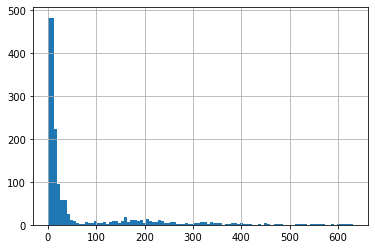

In [26]:
costs['costs'].hist(bins = 100)

<div class="alert alert-block alert-info">
    
По итогам проделанной работы по изучению исходных данных была получена следующая информация.
Пользователи представлены из 4-х регионов: США, Великобритания, Франция и Германия.
Подавляющее большинство пользователей из США - 207 327 чел. или  66,9% от общего количества пользователей.
Типы устройства пользователей представлены 4-мя устройствами: iPhone, Android, PC и Mac.
Большинство клиентов являются пользователями iPhone - 112 603 чел.
Основными источниками пользователей являются каналы organic - 107 760 чел., TipTop - 54 794 чел. и FaceBoom - 49 022 чел.
На них приходится 2/3 всех пользователей (68,3%)*. 
    
    
По итогам анализа исходных данных были скорректированы: 
 - все символы сделаем строчными,
 - устраним пробелы,
 - названия столбцов переименованы  в «змеином регистре».
    
    
Была  проведена работа по поиску пропусков и  дубликатов. 
Пропуски и дубликаты отсутствуют.

Типы данных в столбцах, которые содержат дату и время,  приведены к формату datetime.
    
    
Данные датасетов загружены в датафреймы и подготовлены для дальнейшего анализа.
    
    
    
    
    
    
    
**(*)без учета уникальных user_id**

Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция для создания профилей пользователей**

In [27]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


**Функция для подсчёта Retention Rate**

In [28]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Функция для подсчёта конверсии**

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Функция для подсчёта LTV**

In [30]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Функция для сглаживания данных**

In [31]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Функция для построения графика Retention Rate**

In [32]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Функция для построения графика конверсии**

In [33]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция для визуализации LTV и ROI**

In [34]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Все необходимые функции заданы. Теперь можно приступать к анализу данных.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Определим минимальную и максимальную дату привлечения пользователей

In [35]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [36]:
print ('Минимальная дата привлечения клиентов -', profiles['dt'].min())
print ('Максимальная дата привлечения клиентов -',  profiles['dt'].max())

Минимальная дата привлечения клиентов - 2019-05-01
Максимальная дата привлечения клиентов - 2019-10-27


In [37]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

# создаём опцию «игнорировать горизонт»
ignore_horizon = False
observation_date

datetime.date(2019, 11, 1)

<div class="alert alert-block alert-info">
В задании указано, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Таким образом, принимаем за горизонт анализа 2 недели, а за observation_date - 1 ноября 2019 года.

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.                                                                                                                                Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [38]:
#profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False)

In [39]:
#profiles.groupby('region').agg({'payer': 'mean'}).sort_values(by=['payer'], ascending = False)

In [40]:
region= (
    profiles.groupby('region')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), 
           on = 'region', how = 'left')
)
region.set_axis(['region', 'total_users', 'payers'], axis='columns', inplace=True)
region['payer_rate'] = region.payers / region.total_users
print(region.sort_values(by='payer_rate', ascending=False))

          region  total_users  payers  payer_rate
3  United States       100002    6902    0.069019
1        Germany        14981     616    0.041119
2             UK        17575     700    0.039829
0         France        17450     663    0.037994


Самое большее платящих пользователей приходится  на США - 6 902 чел. или 77,1% от общего числа платящих пользователей. Наименьшая доля платящих пользователей во Франции - 663 чел. В абсолютных занчениях количество платящих пользоватей у европейских стран невелико. Меньше всего платящих пользоваталей находятся в Германии - 616 чел.

In [41]:
channel= (
    profiles.groupby('channel')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), 
           on = 'channel', how = 'left')
)
channel.set_axis(['channel', 'total_users', 'payers'], axis='columns', inplace=True)
channel['payer_rate'] = channel.payers / channel.total_users
print(channel.sort_values(by='payer_rate', ascending=False))

               channel  total_users  payers  payer_rate
1             FaceBoom        29144    3557    0.122049
0           AdNonSense         3880     440    0.113402
9       lambdaMediaAds         2149     225    0.104700
6               TipTop        19561    1878    0.096007
5       RocketSuperAds         4448     352    0.079137
7       WahooNetBanner         8553     453    0.052964
8              YRabbit         4312     165    0.038265
3         MediaTornado         4364     156    0.035747
2              LeapBob         8553     262    0.030633
4   OppleCreativeMedia         8605     233    0.027077
10             organic        56439    1160    0.020553


In [42]:
device= (
    profiles.groupby('device')['user_id'].nunique().reset_index()
    .merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), 
           on = 'device', how = 'left')
)
device.set_axis(['device', 'total_users', 'payers'], axis='columns', inplace=True)
device['payer_rate'] = device.payers / device.total_users
print(device.sort_values(by='payer_rate', ascending=False))

    device  total_users  payers  payer_rate
1      Mac        30042    1912    0.063644
3   iPhone        54479    3382    0.062079
0  Android        35032    2050    0.058518
2       PC        30455    1537    0.050468


<div class="alert alert-block alert-info">

**Вывод:**

Самое большее платящих пользователей приходится  на США - 6 902 чел. или 77,1% от общего числа платящих пользователей. Наименьшая доля платящих пользователей во Франции - 663 чел. В абсолютных значениях количество платящих пользователи у европейских стран невелико. Меньше всего платящих пользователей находятся в Германии - 616 чел.

Более 70% от всех пользователей приходится на следующие 3 канала:
    
organic - 56 439 чел., FaceBoom - 29 144 чел. и TipTop - 19 561 чел. 
При этом большое значение платящих пользователей у FaceBoom - 12,2%, на втором месте - AdNonSense 11,34%, 
на третьем месте - lambdaMediaAds 10.47%.
В абсолютном выражении на первом месте находится FaceBoom  - 3 557 человек, втором TipTop - 1878 чел. и organic - 1160 чел.            
**Стоит удалить внимание каналу TipTop. Он находится только на 4 месте по значению платящих пользователей, при этом по затратам на привлечение он является самым дорогим, как мы увидим далее.**
    
Большинство пользователей являются владельцами техники Apple (iphone и Mac). Общее количество пользователей - 84 521 чел.  Первенство по платящим пользователям также принадлежит им  (коэф. конверсии - 6,3% (Mac) 6,2% (iPhone).


## Анализ затрат на маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Посчитаем общую сумму расходов на маркетинг.

In [43]:
print('Общая сумма расходов на маркетинг составила - ', costs['costs'].sum())

Общая сумма расходов на маркетинг составила -  105497.30000000002


###  Распределение расходов по рекламным источникам

In [44]:
costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

### Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [45]:
#costs['month'] = costs['dt'].astype('datetime64[M]') 
#costs['week'] = costs['dt'].astype('datetime64[W]') 
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs

,dt,channel,costs,dt_month,dt_week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


<AxesSubplot:xlabel='dt_month'>

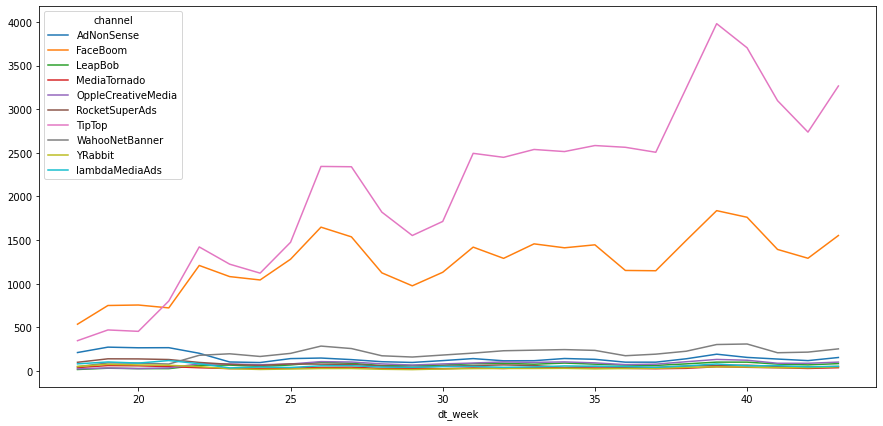

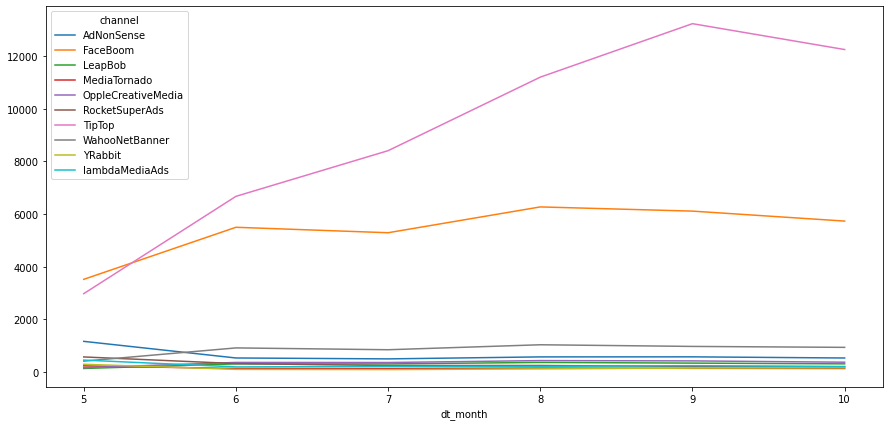

In [46]:

costs.pivot_table(index = 'dt_week', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(figsize = (15,7)) 
costs.pivot_table(index = 'dt_month', columns = 'channel', values = 'costs', aggfunc = 'sum').plot(figsize = (15,7)) 

#### Стоимость привлечения одного пользователя (CAC) из каждого источника.

In [47]:
cac = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
cac

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

In [48]:
cac.mean()

0.6870317251014001

<div class="alert alert-block alert-info">
    
**Вывод:**
    
Общие затраты на маркетинг составили 105 497 дол. При этом, более 80%  или 87 197 тыс. бюджета было направлено на продвижение по каналам TipTop и FaceBoom (54751,3 дол. и 32445,6 дол. соответственно).
Согласно графику изменения расходов, расходы на продвижение по указанным каналам стабильно росли весь анализируемый период за исключением 9 месяца. При этом мы наблюдаем более резкое увеличение финансирование по каналу TipTop.
Расходы на продвижение по остальным каналам существенно не менялись. 
Такие расходы отразились на стоимости привлечения. Как и ожидалось самыми дорогими пришлись пользователи TipTop 2,8 дол. и FaceBoom 1.1 дол.
При этом средняя стоимость привлечения составляет 0,7 дол.
.


## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Анализ окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [49]:
profiles = profiles.query('channel != "organic"')

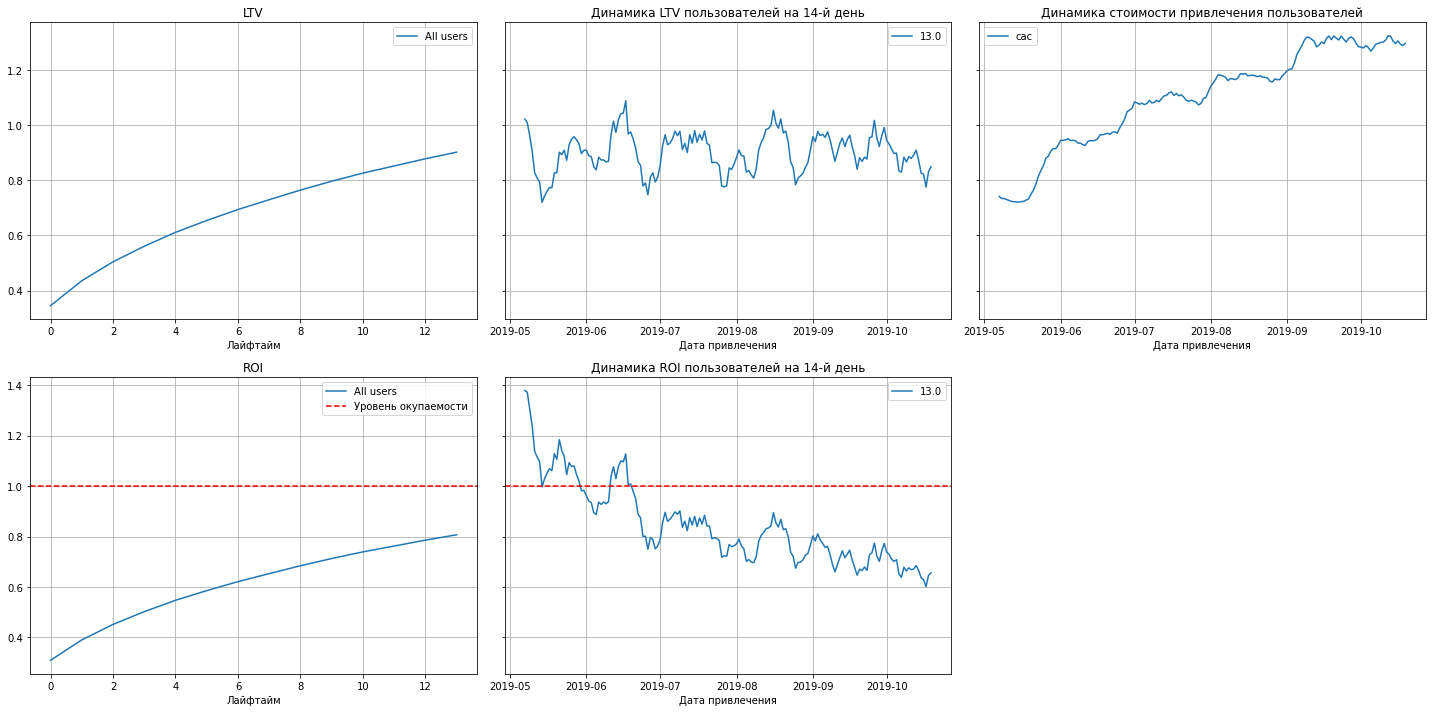

In [50]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

<div class="alert alert-block alert-info">
    
    
**LTV**, или Lifetime Value, — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. 
 
Значение LTV на всем анализируемом растет, что является хорошим показателем. Динамика LTV пользователей на 14 день стабильна, при этом наблюдается снижение в конце месяца и рост в начале. Данные значения указывают на то, что продукт востребован на рынке.
    
**CAC**, или Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент.
    
Динамика стоимости привлечения пользователей растет на протяжении всего изучаемого периода, но имеет тенденцию к стабилизации с сентября 2019 года.
В конце мая наблюдается резкий скачок стоимости привлечения, что может быть связано с началом рекламной компании.
    

**ROI**, или Return On Investment, — окупаемость инвестиций. В экономике одного покупателя эта метрика показывает, на сколько процентов LTV превысил CAC. 
    
 Исходя из графика, ROI не достигла уровня окупаемости. Динамика ROI показывает, что продукт окупался до июня 2019 года, далее он стабильно убыточен с негативной тенденцией, что может быть связано со все большим увеличением затрат на привлечение пользователей.


### Анализ окупаемости рекламы с разбивкой по рекламным каналам

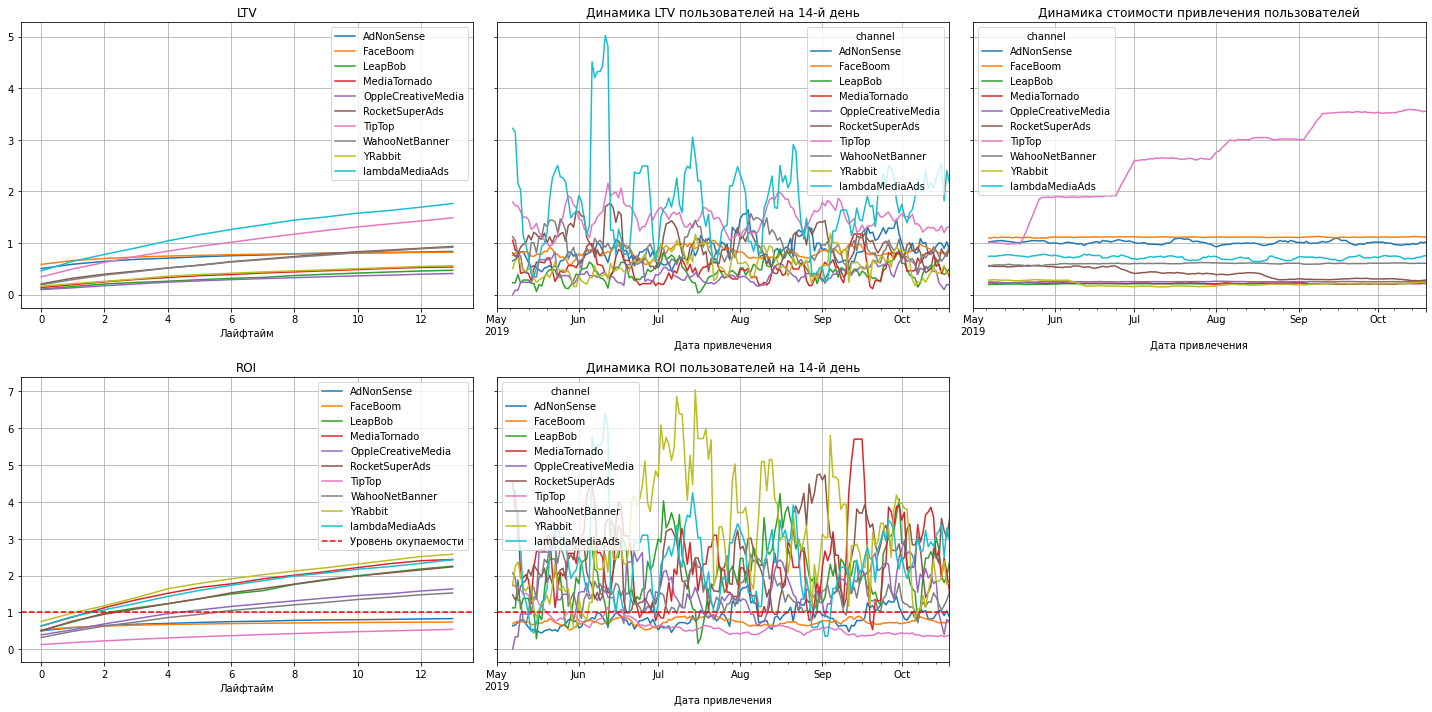

In [51]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
) 

<div class="alert alert-block alert-info">
    
 Исходя из графиков можно сделать следующие выводы:
    
 Реклама не окупается только по каналам TipTop, FaceBoom и AdNonSense. Быстрее всего окупается канал YRabbit.
 Ежемесячно растут затраты на привлечение клиента по каналу TipTop, при том что затраты по другим каналам не меняются на всем периоде на анализа. Возможно необходимо проверить обоснованность направления рекламных средств в этот канал, игнорируя другие, в том числе тех, срок окупаемости которых составляет 2 - 4 месяца.

### Анализ окупаемости рекламы с разбивкой по странам

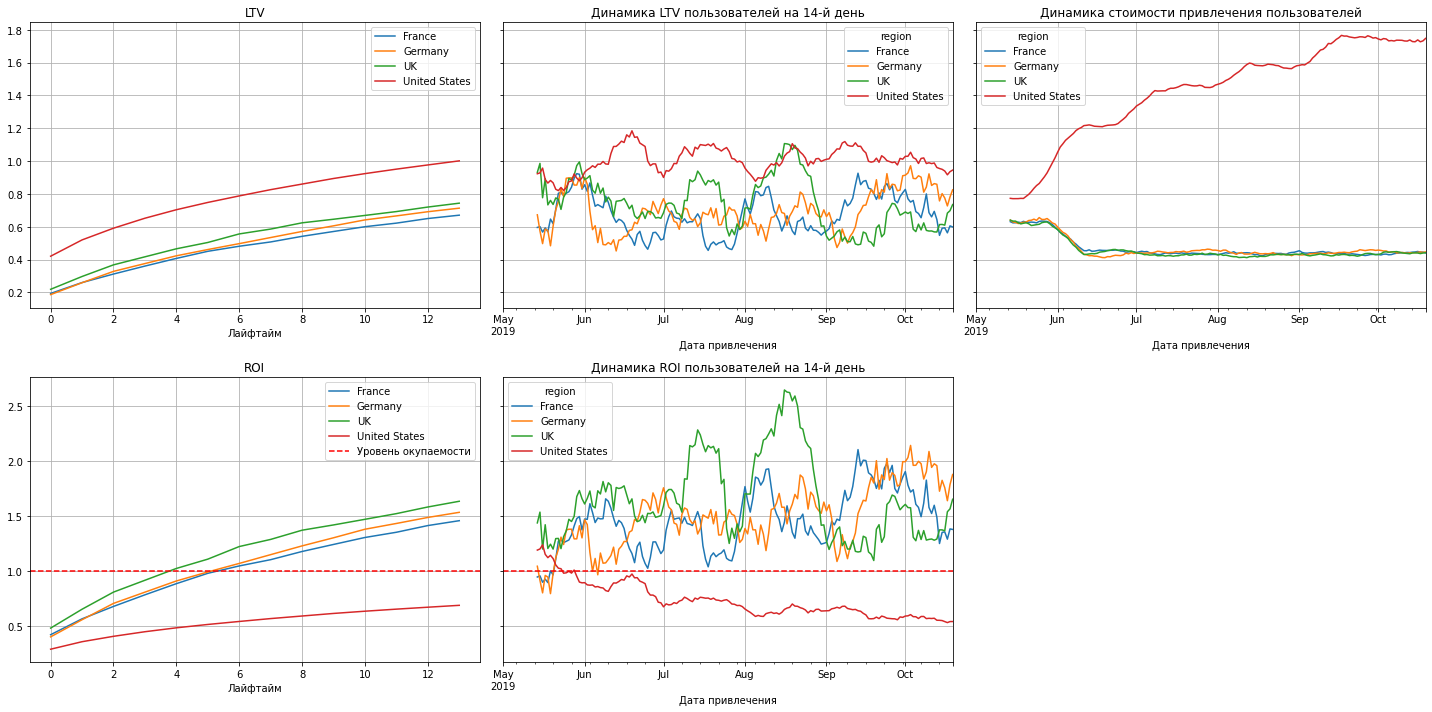

In [52]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-block alert-info">
    
Следует обратить отдельное внимание на США (красная линия) и на европейские страны.
Показатель LTV положителен во всех странах и имеет положительную тенденцию.
Реклама не окупается только по пользователям США, окупаемость в европейских странах происходит уже на 2-3 месяц. При этом динамика окупаемости за 14 дней имеет негативную тенденцию на всем периоде изучения. Быстрее всего окупаются пользователи из Великобритании.
Существенно выросли затраты на привлечение клиентов из США, при том что затраты по другим странам выросли несущественно. 


### Анализ окупаемости рекламы с разбивкой по устройствам

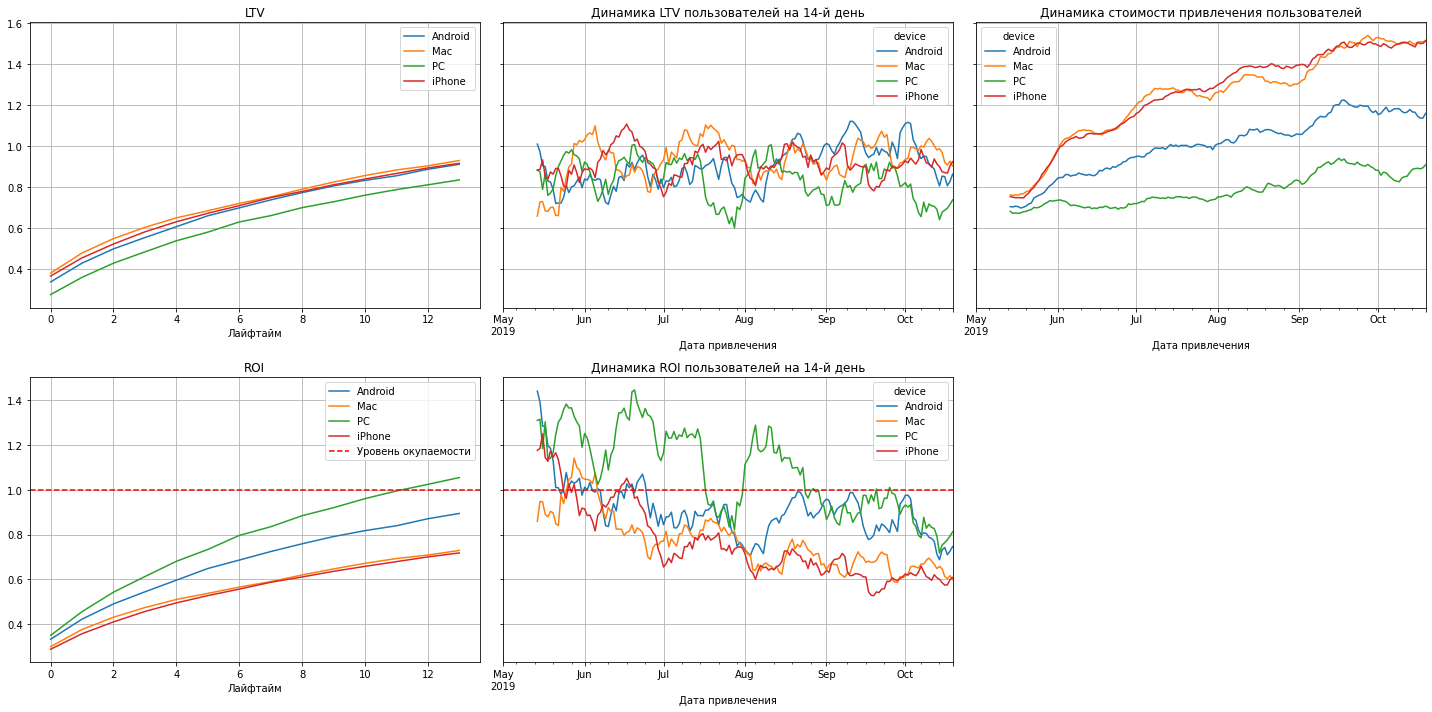

In [53]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<div class="alert alert-block alert-info">
Анализ окупаемости рекламы с разбивкой по устройствам показывает в целом аналогичную тенденцию - самые многочисленные группы (iPhone, Mac) имееют самые низкие показатели по окупаемости и самые высокие по стоимости привлечения.

<div class="alert alert-success">

**✔️ Комментарий ревьюера v2✔️**
   
   При этом стоит помнить, что основная масса пользователей США использует технику аррle

</div>


### Конверсии и удержания в разрезе стран/каналов/устройств

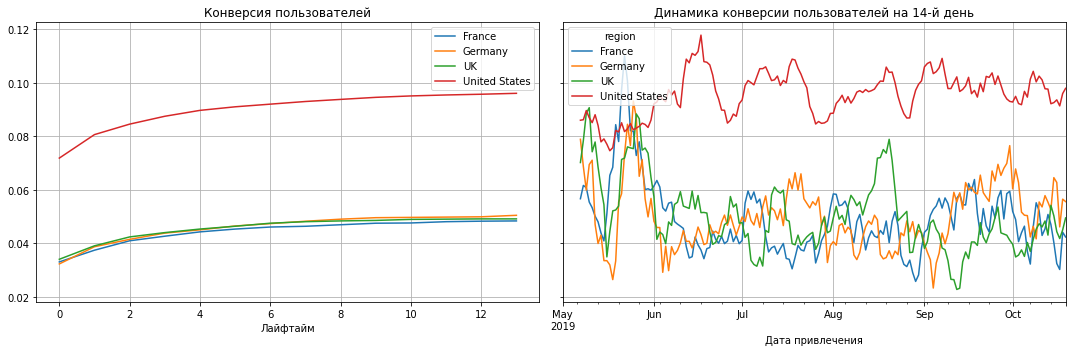

In [54]:
# смотрим конверсию с разбивкой по региону

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-block alert-info">

**Вывод:**
    
Конверсия пользователей из США существенно предосходит конверсию пользователей из Европы.

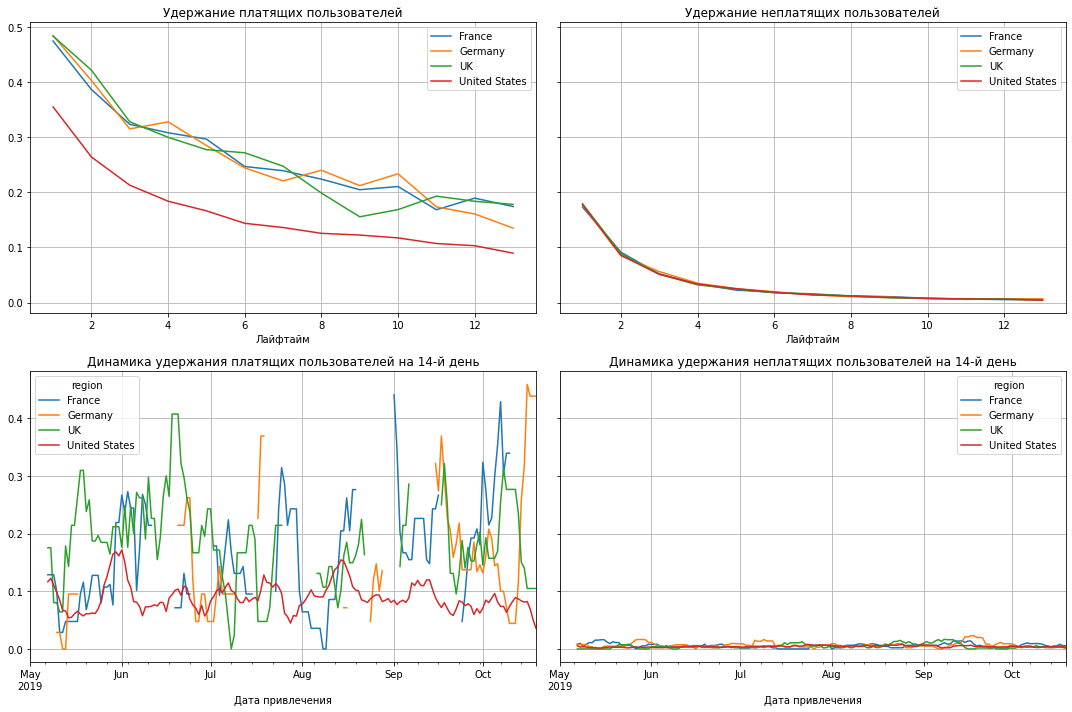

In [55]:
# смотрим удержание с разбивкой по региону

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'],
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-block alert-info">

**Вывод:**
    
Несмотря на превосходящую конверсия пользователей из США удержание у них самое низкое.

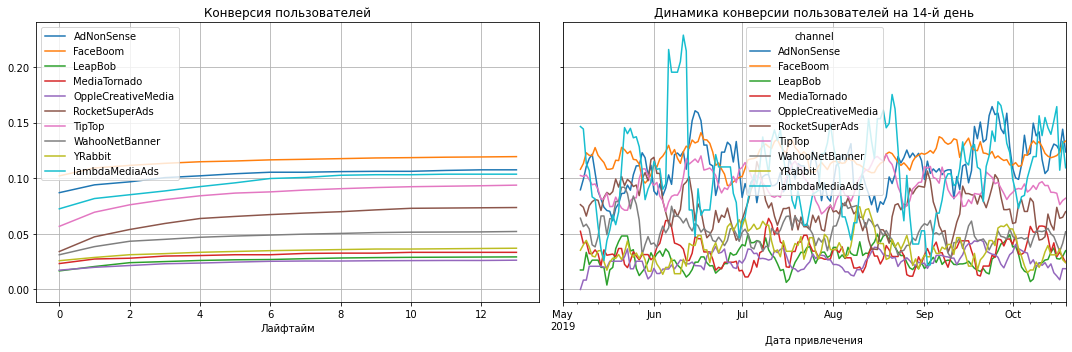

In [56]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-block alert-info">

Вывод:

Лучшая конверсия пользователей у канала FaceBoom, AdNonSense и IambdaMediaAds.

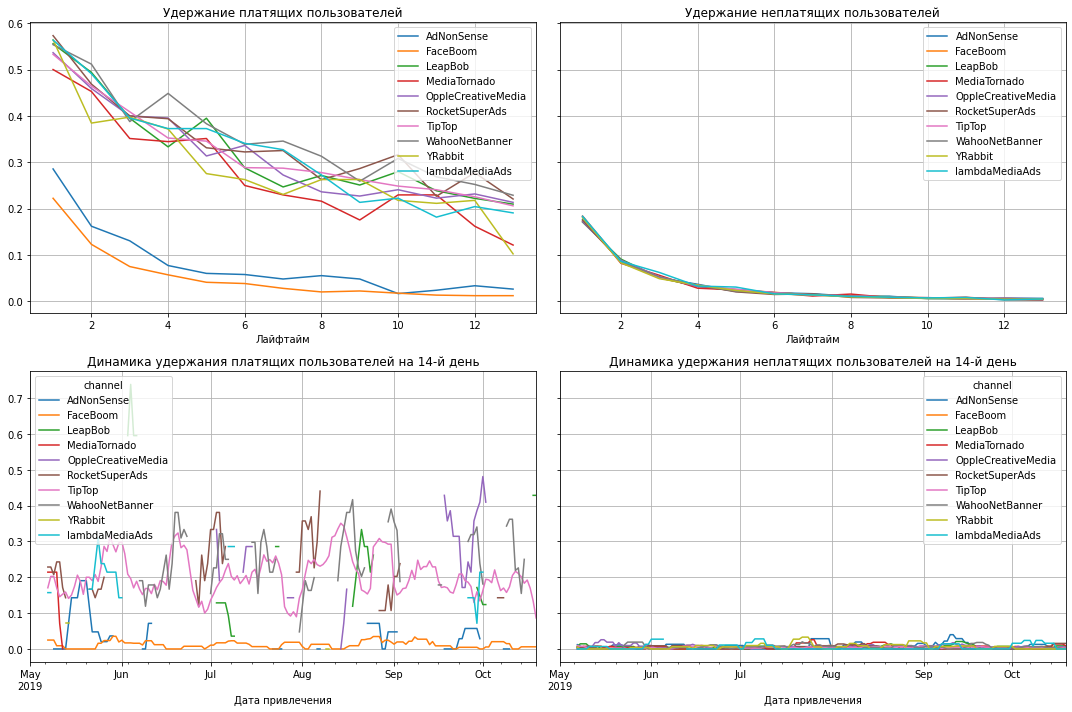

In [57]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel'],
)

plot_retention(retention_grouped, retention_history, horizon_days) 


<div class="alert alert-block alert-info">

Вывод:

Лудержание платящих пользователей по каналам FaceBoom и AdNonSense самое низкое. При этом, канал TipTop показывает среденее зачение по удержанию.

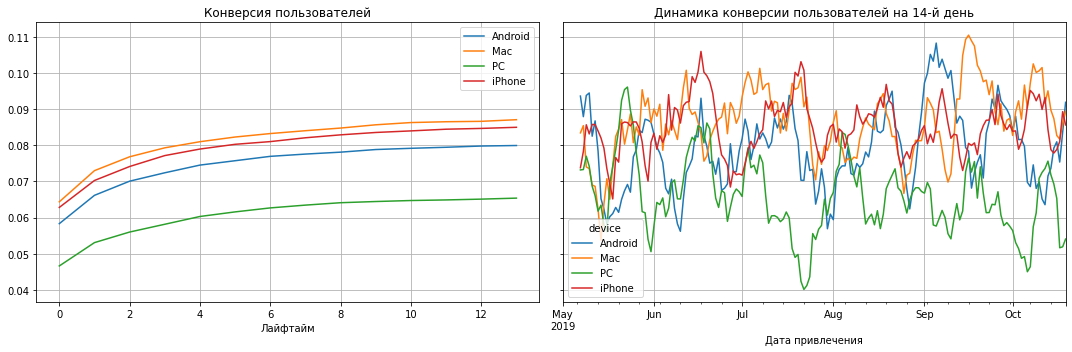

In [58]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device'],
    ignore_horizon=False,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

<div class="alert alert-block alert-info">

**Вывод:**
    
Конверсия у пользователей продукции Apple существенно выше, чем у PC. Возможно, это связано с наличием мобильного приложения.

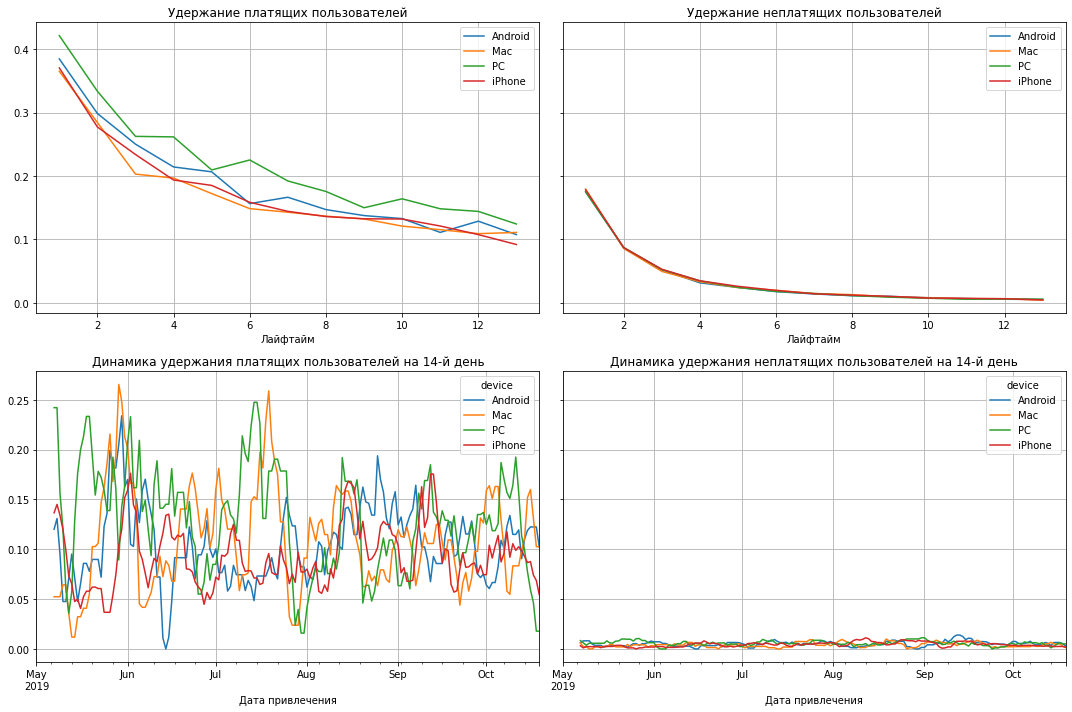

In [59]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device'],
)

plot_retention(retention_grouped, retention_history, horizon_days) 

<div class="alert alert-block alert-info">

**Вывод:**
    
Удержание у  пользователей всех устройств равномерное, чуть лучше у держателей устройств Android и PC.

## Вывод


- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<div class="alert alert-block alert-info">

На основе анализа пользоваталей из США, Великобритании, Франции и Герамании, привлеченных с 1 мая 2019 года по 27 октября 2019 года, был проведен анализ данных о посещениях сайта, заказах и расходах на рекламу. 
Подавляющее большинство клиентов приходят по естественным "органичесим" каналам, но среди них самое маленькое количество плательщиков - 2,1%. Превалирующая часть клиентов из США, в т.ч. среди них больше всего плательщиков. Большинство клиентов используют iPhone. Более 80% или 87 197 тыс.  рекламного бюджета было направлено на продвижение по каналам TipTop и FaceBoom.
    
**Основные причины неэффективности привлечения пользователей**

Слабая диверсификация по регионам - на привлечение клиентов из США направлены существенная часть рекламного бюджета(возмжно в ущерб ругим регионам), при этом затраты по остальным регионам не изменились. Это может быть обосновано, т.к. в США один из самых высоких уровней жизни и большая численность населения.
При этом денежные средства, направленные на привлечение пользователей в США не окупаются.
По всей видимости каналы FaceBoom и TipTop генерируют только траффик клиентов из США, на рекламу которых направлена большая часть денежных средств. Но по показателям удержания этим каналы занимимаю последние места.
    
**Рекомендации для отдела маркетинга**

- Необходимо провести обоснование высоких затрат на привлечение по каналы FaceBoom и TipTop.
- Для привлечения большего количества пользоваталей можно увеличить количество рекламных компаний в канале IAmbdamediaAds, т.к. в этом канале наибольшая доля платящих пользоваталей.
- Для привлечения большего количества пользоваталей необходимо увеличить количество рекламных компаний в канале Yrabbit, т.к. в он является самым прибыльным в расчете на одного пользователя.
 В целом обратить внимание на каналы, которые я
    
    

    